# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

*Note: I used GitHub CoPilot in Visual Studio Code in this exercise to benefit from gaining exposure to code assist generative AI. Prompts are shown in comments with manual edits applied to generated code.*

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [73]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [74]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [75]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

# create a copy of the dataframe
df_original = df.copy()

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [76]:
'''Calculate the number of rows and columns in the dataset'''
# returns the number of rows and columns
df.shape

(1898, 9)

#### Observations:
There are 1,898 rows in the data and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [77]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- Order ID, customer ID, food preparation time, and delivery time columns are integer data types.
- Cost of the order column is float or decimal data type.
- Restaurant name, cuisine type, day of the week, and rating columns are strings or character data types.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [78]:
'''Find missing values in the dataset'''
# returns the number of missing values in each column
print("Number of null values in each column:\n", df.isnull().sum(), sep='')

print("")

'''What are the unique values in each column?'''
# returns the unique values in each column
print("Unique values in each column:\n", df.nunique(), sep='')

# Print the unique values in each column
for column in df.columns:
    '''Create an if statement excluding column variable if it contains characters "_id" '''
    if '_id' not in column:
        '''Print the unique values in each column'''
        print(f"Unique values in {column} column:\n{df[column].unique()}\n", sep='')

'''Find the number of "Not given" values in the rating column'''
# returns the number of "Not given" values in the rating column
print("Number of not given values in rating column: ", df[df['rating'] == 'Not given'].shape[0])

'''Convert the "Not given" values in the rating column to NaN'''
# replace the "Not given" values in the rating column with NaN
df['rating'].replace('Not given', np.nan, inplace=True)

'''Convert the rating column to float'''
# convert the rating column to float
df['rating'] = df['rating'].astype(float)

'''Find the number of NaN values in the rating column'''
# returns the number of NaN values in the rating column
print("New number of null values in rating column (should match previous count of Not given): ", df['rating'].isnull().sum())

Number of null values in each column:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Unique values in each column:
order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64
Unique values in restaurant_name column:
['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' '

#### Observations:
- There are no missing or null (NaN) data values.
- However, the "rating" column contains 736 values of "Not given" which can be considered the same as null for this project. Orders with ratings not provided ("Not given") can be important to the business to obtain more feedback.
- The text values causes the column's data type to be an object, thus preventing any numerical statistics on the valid ratings.
- So the "Not given" values were treated by replacing them with NaN as no value is available and imputing missing ratings with a descriptive statistical measure of central tendency could lead to erroneous results. This enables numerical statistics to be calculated on the ratings column, such as average rating which is needed for a subsequent question.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [79]:
#Statistical summary of the food_prepation_time column including minimum, mean, and maximum values
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
- The minimum food preparation time was 20 minutes.
- The average food preparation time was 27 minutes.
- The maximum food preparation time was 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [80]:
# returns the number of "Not given" values in the rating column
df_original[df_original['rating'] == 'Not given'].shape[0]

736

#### Observations:
There are 736 orders not rated or "Not given" in the original dataset.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Check the ID and name columns:**

In [81]:
#print the number of unique order_id values in the dataset
print("Unique order IDs:", df['order_id'].nunique())

Unique order IDs: 1898


- *Order ID is unique per row in the dataframe, which is good as it is the unique identifier of the orders dataset.*

In [82]:
#print the number of unique customer_id values in the dataset
print("Unique customer IDs:", df['customer_id'].nunique())

Unique customer IDs: 1200


- *There are fewer customer IDs than the number of rows. This indicates repeat customers making multiple orders.*

In [83]:
#print the number of unique restaurant names in the dataset
print("Unique restaurant names:", df['restaurant_name'].nunique())

Unique restaurant names: 178


- *Orders were placed through Food Hub to 178 restaurants.*

**Explore the numerical variables:**

#### **Observations on Cost of the Order**

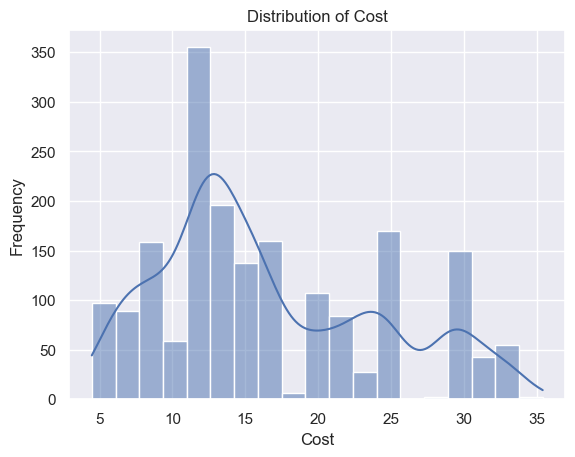

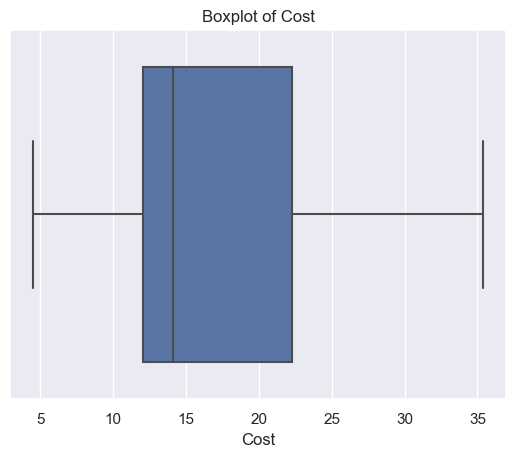

In [84]:
# Set the style of the plots
sns.set(style="darkgrid")
# Create a histogram for the 'cost' variable
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()
# Create a boxplot for the 'cost' variable
sns.boxplot(data=df, x='cost_of_the_order')
plt.title('Boxplot of Cost')
plt.xlabel('Cost')
plt.show()

- *The distribution of order cost is right skewed and slightly multi-modal.*
- *50% of order costs fall between approximately $12 and $22, with the median of ~$14 relatively low in the range. This suggests orders are typically for one person.*
- *There are no outliers in the dataset.*

#### **Observations on Food Preparation Time**

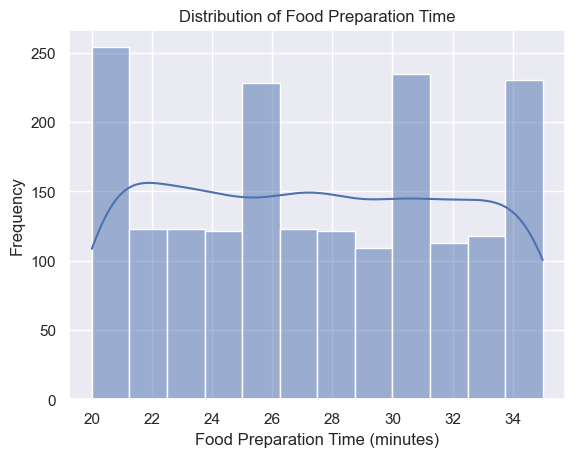

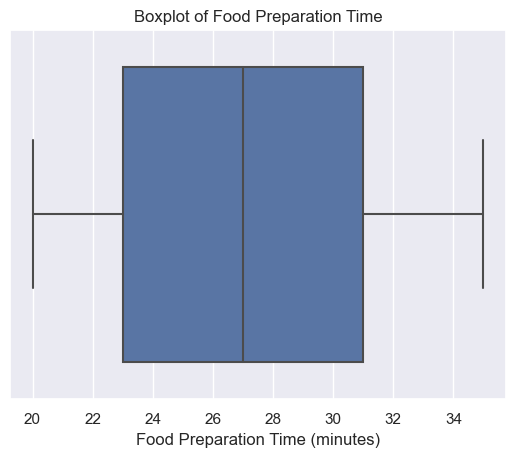

In [85]:
# Create a histogram for the 'food_preparation_time' variable
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()
# Create a boxplot for the 'food_preparation_time' variable
sns.boxplot(data=df, x='food_preparation_time')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.show()

- *Prep time is quite evenly distributed across the range with multiple modes, a minimum of 20 and maximum of 35 minutes.*
- *The median prep time is 27 minutes and 50% fall within an 8 minute window of 23 to 31 minutes.*
- *No outliers are present for the variable.*

#### **Observations on Delivery Time**

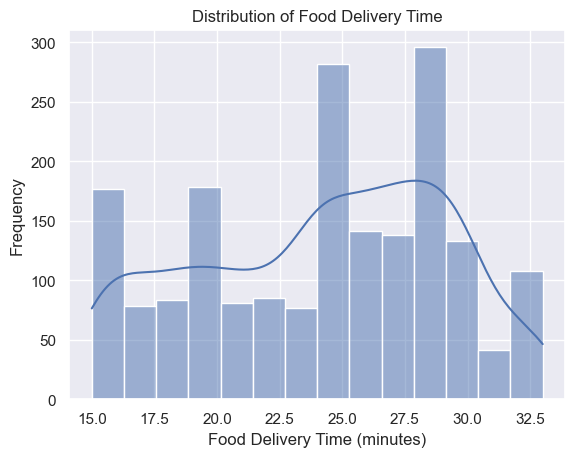

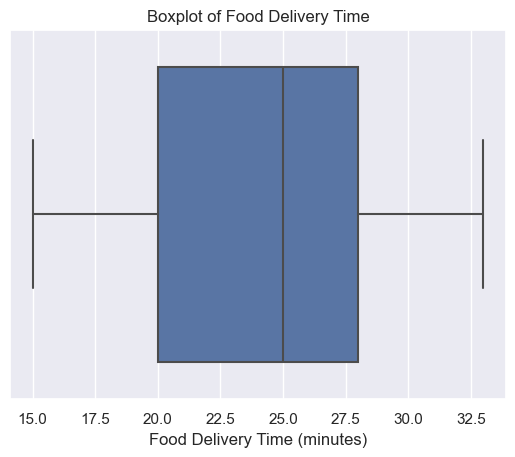

In [86]:
# Create a histogram for the 'food_delivery_time' variable
sns.histplot(data=df, x='delivery_time', kde=True)
plt.title('Distribution of Food Delivery Time')
plt.xlabel('Food Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()
# Create a boxplot for the 'food_delivery_time' variable
sns.boxplot(data=df, x='delivery_time')
plt.title('Boxplot of Food Delivery Time')
plt.xlabel('Food Delivery Time (minutes)')
plt.show()

- *Delivery time is somewhat left skewed with a relatively high mode and median of approximately 29 and 25 minutes respectively.*
- Minimum delivery time is 15 minutes, and maximum approximately 33 minutes. 50% of deliveries took 20-28 minutes.
- *There are no outliers in the dataset.*
- *Of course the total time from order to obtaining food is what matters to customers, which is the sum of prep and delivery times.*

**Next explore the categorical variables:**

#### **Observations on Cuisine Type**

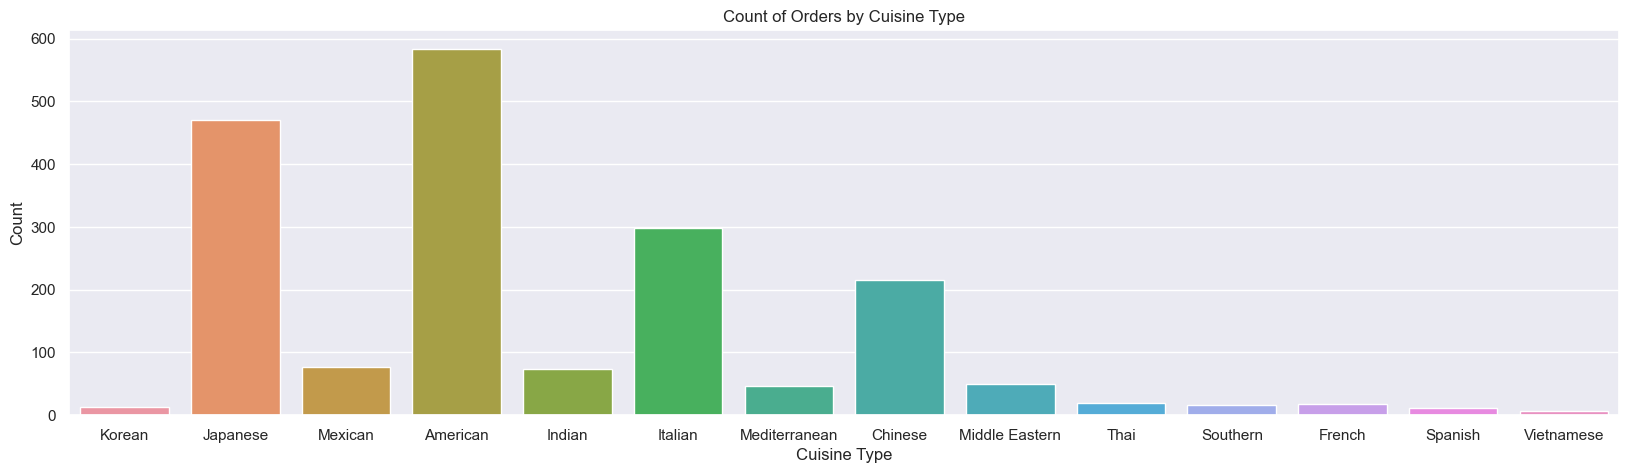

In [87]:
plt.figure(figsize=(20, 5))
# Create a countplot for the 'cuisine_type' variable
sns.countplot(data=df, x='cuisine_type')
plt.title('Count of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.show()

- *American is the most popular cuisine with nearly 600 orders. Japanese has a large number of orders with ~475.*
- *Italian and Chinese are also popular at 200-300 orders each.*
- *Other cuisines are less popular with fewer than 100 orders each.*

#### **Observations on Day of Week**

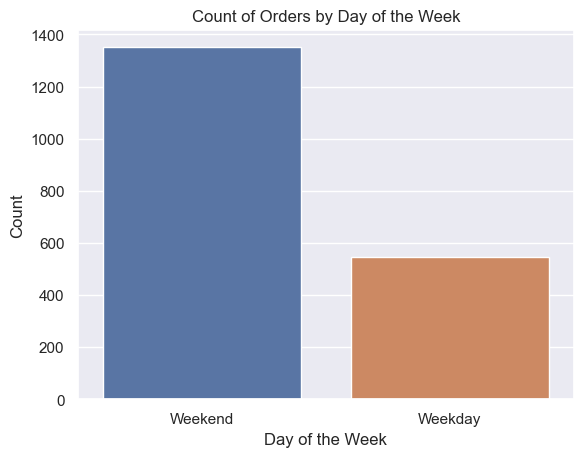

In [88]:
# Create a countplot for the 'day_of_the_week' variable
sns.countplot(data=df, x='day_of_the_week')
plt.title('Count of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

- *Orders are categorized by weekend or weekday, not the actual day of week.*
- *Weekend orders are over twice as popular as weekdays. This is surprising as weekends are only 2 out of 7 days while weekdays are 5.*
- *These counts may mean the business should really hone in on perfecting weekend operations to maximize revenue. Or, the business may want to focus on bolstering weekday order frequency to gain revenue during the majority of the week.*

#### **Observations on Ratings**

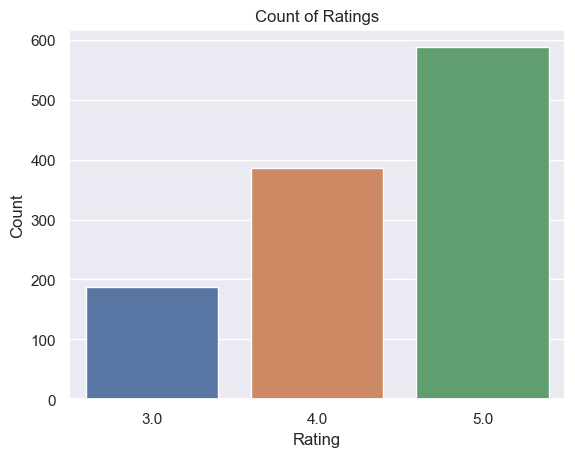

In [89]:
# Create a countplot for the 'rating' variable
sns.countplot(data=df, x='rating')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

- *Ratings are distributed from mediocre (3) to highly satisfied (5). There are no unsatisfied ratings of 0-2.*
- *Overall ratings across all orders is very high with highly satisfied customers (5) representing almost half of all orders. Good (4) ratings are 2nd most numerous.*

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [90]:
top_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the restaurants with the most orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [91]:
'''Find the most popular cuisine on the weekend'''
# returns the most popular cuisine on the weekend
print("Most popular cuisine on the weekend: ", df[df['day_of_the_week'].isin(['Weekend'])]['cuisine_type'].value_counts().idxmax())

Most popular cuisine on the weekend:  American


#### Observations:
- "American" food is the most popular type on the weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [92]:
'''What percentage of orders cost more than $20?'''
# returns the percentage of orders that cost more than $20
print("Percentage of orders that cost more than $20: ", df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0] * 100)

Percentage of orders that cost more than $20:  29.24130663856691


#### Observations:
- 29.2% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [93]:
'''Find the mean delivery_time'''
# returns the mean delivery_time
print("Mean delivery time: ", df['delivery_time'].mean())

Mean delivery time:  24.161749209694417


#### Observations:
The mean delivery time is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [94]:
'''Find the 3 most frequent customer_ids'''
# returns the 3 most frequent customer_ids
print("3 most frequent customer_ids:\n", df['customer_id'].value_counts().head(3), sep='')

3 most frequent customer_ids:
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
The 3 most frequent customers and their order counts are below:
| Customer ID      | Order Count |
| ----------- | ----------- |
| 52832      | 13       |
| 47440   | 10        |
| 83287   | 9        |

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### **Heatmap of correlation matrix to identify correlations between numeric variables for further analysis:**

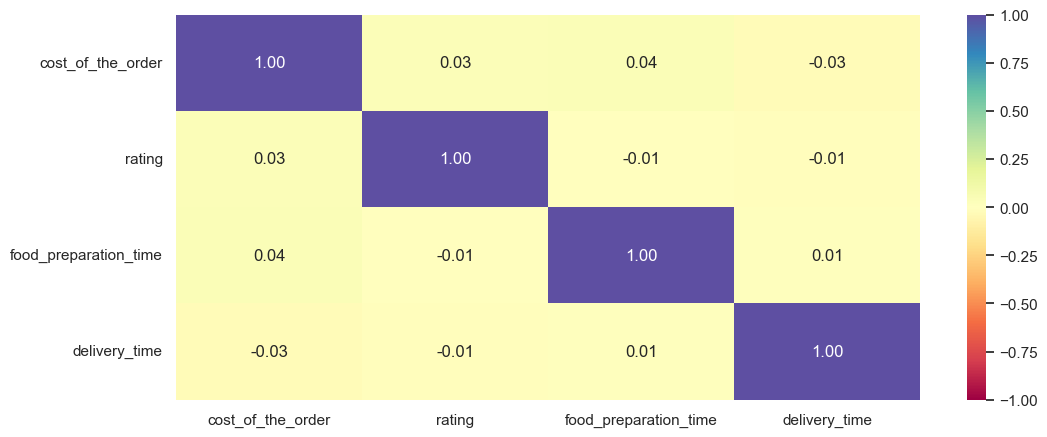

In [108]:
# Check for correlation among numerical variables
num_var = ['cost_of_the_order','rating','food_preparation_time','delivery_time']
corr = df[num_var].corr()
# plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *No correlation is found between numerical variables.*

#### **Comparison of ratings to cuisine type and numeric variables:**

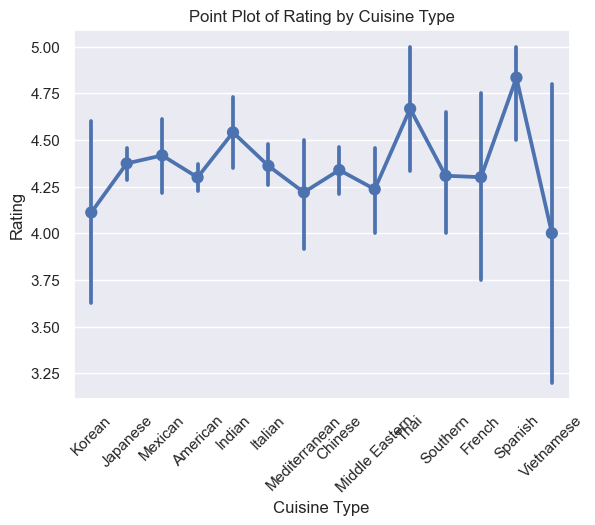

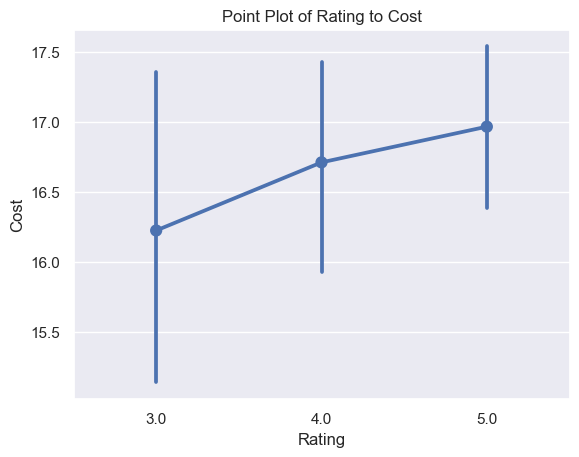

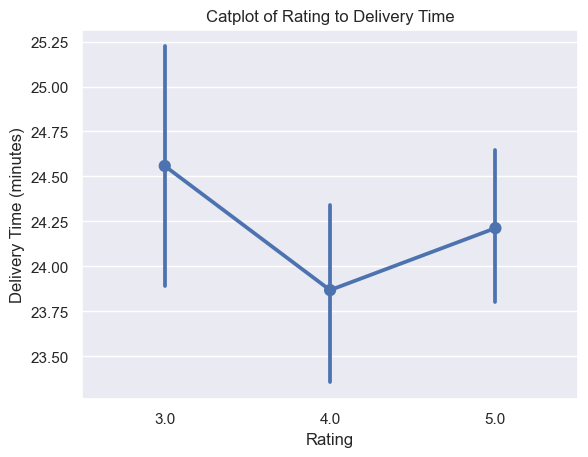

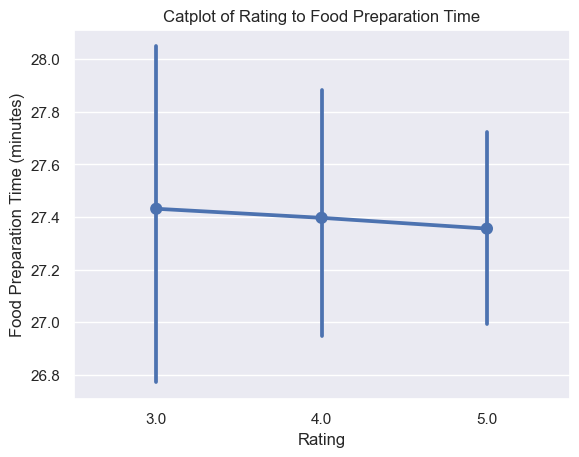

In [124]:
#Point plot of rating by cuisine_type
sns.pointplot(data=df, x='cuisine_type', y='rating')
plt.title('Point Plot of Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

#Point plot of rating to cost
sns.pointplot(data=df, x='rating', y='cost_of_the_order')
plt.title('Point Plot of Rating to Cost')
plt.xlabel('Rating')
plt.ylabel('Cost')
plt.show()

#Plot of the rating and delivery time
sns.pointplot(data=df, x='rating', y='delivery_time')
plt.title('Catplot of Rating to Delivery Time')
plt.xlabel('Rating')
plt.ylabel('Delivery Time (minutes)')   
plt.show()

#plot of the rating and food preparation time
sns.pointplot(data=df, x='rating', y='food_preparation_time')
plt.title('Catplot of Rating to Food Preparation Time')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()

- *The majority of cuisine type ratings are 4 or above.*
- *Vietnamese and Korean are rated relatively lower with Vietnamese having the most mixed reviews of any type. Spanish and Thai are rated relatively higher.*
- *As the cost increases, ratings are generally higher.*
- *Generally, more mixed reviews or lower ratings occcur as prep or delivery time increase.*

#### **Comparison of cuisine type to numeric variables:**

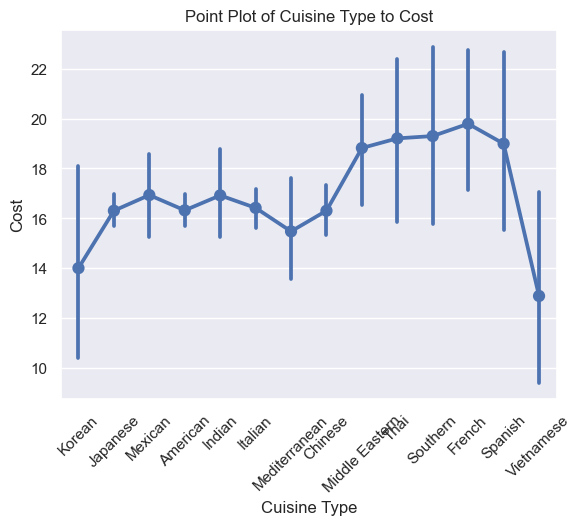

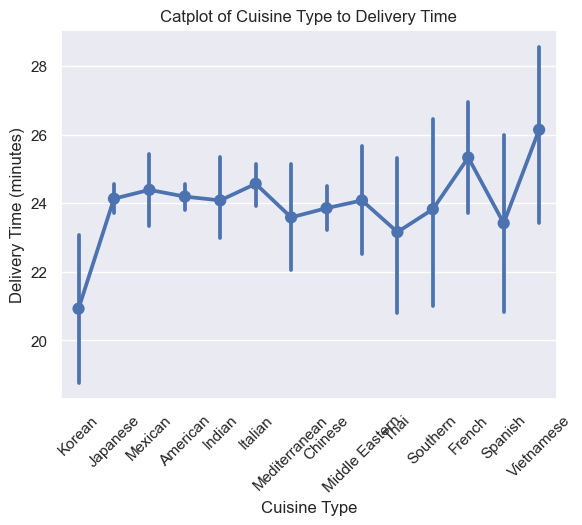

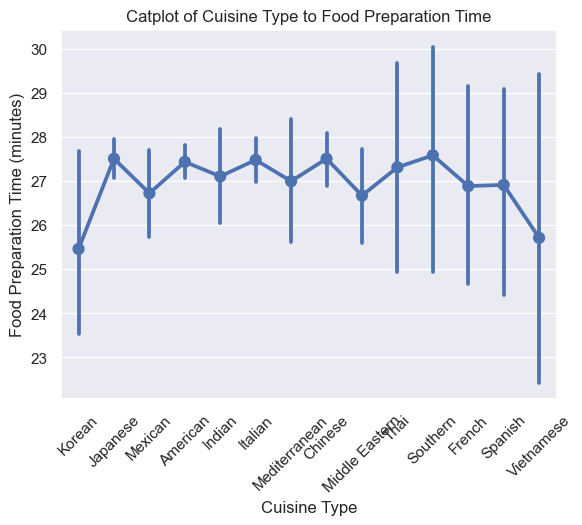

In [125]:
#Point plot of cuisine type to cost
sns.pointplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.title('Point Plot of Cuisine Type to Cost')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.show()

#Plot of the cuisine type and delivery time
sns.pointplot(data=df, x='cuisine_type', y='delivery_time')
plt.title('Catplot of Cuisine Type to Delivery Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

#plot of the cuisine type and food preparation time
sns.pointplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.title('Catplot of Cuisine Type to Food Preparation Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (minutes)')
plt.xticks(rotation=45)
plt.show()

- *Spanish, French, Southern, Thai, and Middle Eastern are the most expensive food types.*
- *Delivery time is high for Vietnamese and French, and lower for Korean compared to the others in the dataset.*
- *Preparation time is fairly consistent across cuisines, with the exception of Vietnamese and Korean which are lower.*

/Users/jamessomerville/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jamessomerville/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


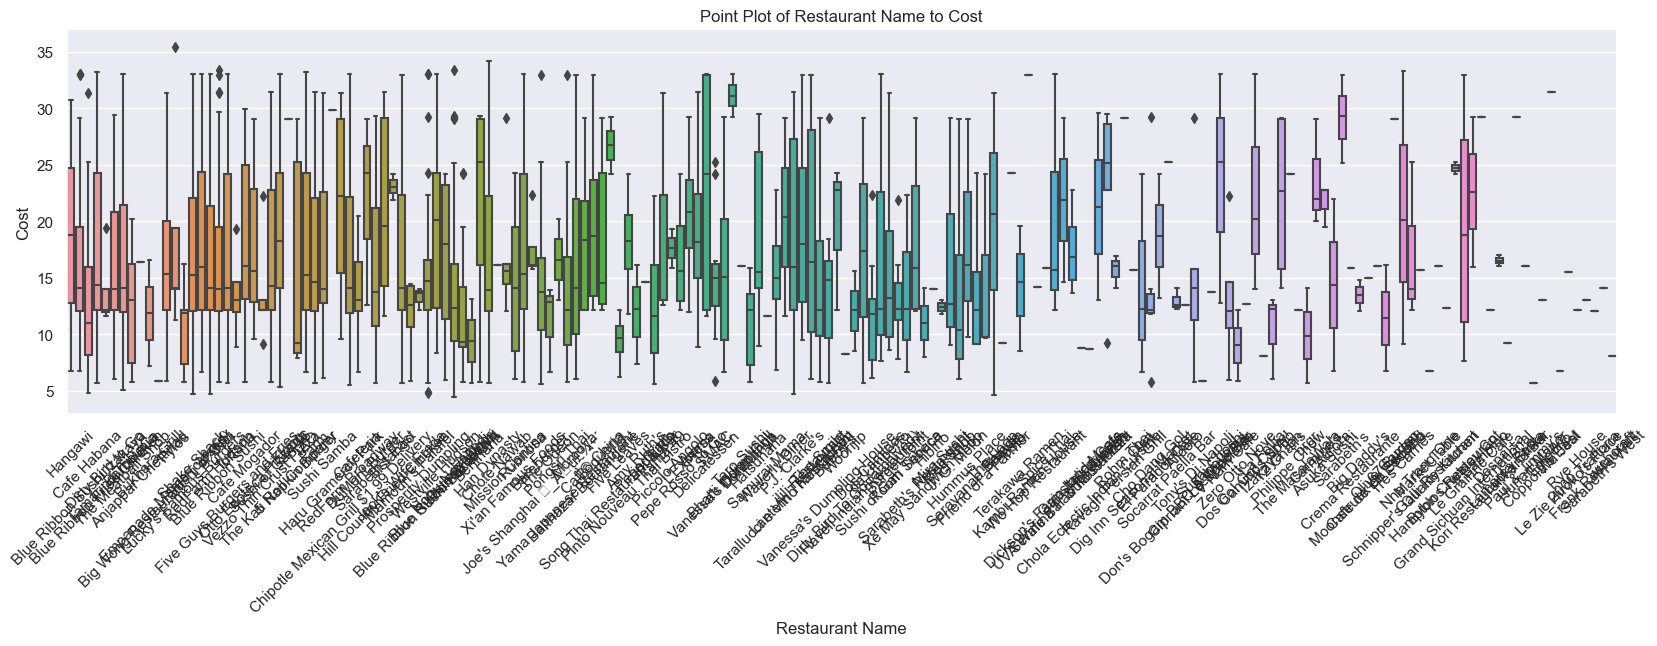

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

In [129]:
#Plot the restaurant name and cost
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='restaurant_name', y='cost_of_the_order')
plt.title('Point Plot of Restaurant Name to Cost')
plt.xlabel('Restaurant Name')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.show()

df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

- *Popular restaurants such as Shake Shack bring in a lot more revenue than other restaurants.*

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [96]:
'''From df, find the restaurant_names with a rating count of more than 50 and an average rating of more than 4'''
# returns the restaurant_names with a rating count of more than 50 and an average rating of more than 4
df_rest_rating = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
df_rest_rating = df_rest_rating[(df_rest_rating['count'] > 50) & (df_rest_rating['mean'] > 4)]
print("Restaurant names with a rating count of more than 50 and an average rating of more than 4:\n", df_rest_rating, sep='')

Restaurant names with a rating count of more than 50 and an average rating of more than 4:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
- Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken qualify for the promotional offer based on the conditions.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [97]:
'''Create a function called "Food_Hub_Revenue_Calculation" that takes a cost parameter and applies a 25% surcharge for orders that cost more than $20 and a 15% surcharge for orders that cost greater than $5 to $20.'''
# returns the total revenue
def Food_Hub_Revenue_Calculation(cost):
    if cost > 20:
        return cost * .25
    elif cost > 5:
        return cost * .15
    else:
        return 0
    
'''Apply the function to the cost_of_the_order column and create a new column called "food_hub_revenue"'''
# apply the function to the cost_of_the_order column and create a new column called "food_hub_revenue"
df['food_hub_revenue'] = df['cost_of_the_order'].apply(Food_Hub_Revenue_Calculation)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,food_hub_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385


In [98]:
'''Find the total revenue generated by Food Hub'''
# returns the total revenue generated by Food Hub
print("Total revenue generated by Food Hub: ", df['food_hub_revenue'].sum())

Total revenue generated by Food Hub:  6166.303


#### Observations:
- The revenue of FoodHub for this dataset is $6,166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [102]:
'''Create a new column in the dataframe that sums the "food_preparation_time" and "delivery_time" columns called "total_time"'''
# create a new column in the dataframe that sums the "food_preparation_time" and "delivery_time" columns called "total_time"
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,food_hub_revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385,49


In [103]:
'''What percentage of orders take more than 60 minutes total_time?'''
# returns the percentage of orders that take more than 60 minutes total_time
print("Percentage of orders that take more than 60 minutes total_time: ", df[df['total_time'] > 60].shape[0] / df.shape[0] * 100)

Percentage of orders that take more than 60 minutes total_time:  10.537407797681771


#### Observations:
- 10.5% of orders take more than 60 minutes from order to receiving food for the customer.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [100]:
'''Find the mean delivery_time for day_of_the_week by "Weekday" and "Weekend"'''
# returns the mean delivery_time for day_of_the_week by "Weekday" and "Weekend"
deliveryTimeWeekday = df[df['day_of_the_week'].isin(['Weekday'])]['delivery_time'].mean()
deliveryTimeWeekend = df[df['day_of_the_week'].isin(['Weekend'])]['delivery_time'].mean()
print("Mean delivery_time for day_of_the_week by \"Weekday\": ", deliveryTimeWeekday)
print("Mean delivery_time for day_of_the_week by \"Weekend\": ", deliveryTimeWeekend)
print("Difference in mean delivery_time for day_of_the_week by \"Weekday\" and \"Weekend\": ", deliveryTimeWeekday - deliveryTimeWeekend)


Mean delivery_time for day_of_the_week by "Weekday":  28.340036563071298
Mean delivery_time for day_of_the_week by "Weekend":  22.4700222057735
Difference in mean delivery_time for day_of_the_week by "Weekday" and "Weekend":  5.870014357297798


#### Observations:
- The average delivery time for the weekdays is 5.87 minutes longer than for weekends. This is likely due to worse traffic on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---